In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.4
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.21.6
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.6.4
keras.api._v2.keras 2.6.0


In [2]:
imdb = keras.datasets.imdb
vocab_size = 10000
index_from = 3
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=vocab_size, index_from=index_from)
word_index = imdb.get_word_index()
print(len(word_index))
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<END>'] = 3

1654784/1641221 [==============================] - 0s 0us/step
88584


In [3]:
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])


def decode_review(text_ids):
    return ' '.join(
        [reverse_word_index.get(word_id, "<UNK>") for word_id in text_ids])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [4]:
max_length=500
train_data=keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index['<PAD>'],
    padding='post',
    maxlen=max_length)
print(train_data[1])
test_data=keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index['<PAD>'],
    padding='post',
    maxlen=max_length)
print(test_data[1])

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [5]:
embedding_dim = 16
batch_size = 512
# 单向循环神经网络
single_rnn_model=keras.models.Sequential([
    keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    # return_sequences=True返回所有输出序列，False只返回最后一个输出
    # return_sequences不再返回前面的输出结果，只保留rnn所有输出结果的最后一个
    keras.layers.SimpleRNN(units=64, # 输出空间的维度 隐藏层神经元数
                           return_sequences=False),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
single_rnn_model.summary()
single_rnn_model.compile(optimizer = 'adam',
                         loss = 'binary_crossentropy',
                         metrics = ['accuracy'])
print(16*64+64*64+64)

2022-08-02 04:36:29.967827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5184      
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 169,409
Trainable params: 169,409
Non-trainable params: 0
_________________________________________________________________
5184


2022-08-02 04:36:30.080561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 04:36:30.081372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 04:36:30.083268: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-02 04:36:30.083573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [6]:
# X_t*U+S_(t-1)*W+bias  [None,16]@[16,64]=[None,64]-->[None,64]@[64*64]=[None,64]
print(16*64+64*64+64)
single_rnn_model.variables

5184


[<tf.Variable 'embedding/embeddings:0' shape=(10000, 16) dtype=float32, numpy=
 array([[ 0.01352813,  0.0383968 , -0.03425353, ..., -0.01509982,
         -0.04562478,  0.00921679],
        [-0.04466153, -0.02329762,  0.04570409, ...,  0.04086313,
          0.01777854, -0.04358696],
        [ 0.0104805 ,  0.01704517, -0.04496516, ...,  0.02895273,
         -0.02850969, -0.03725734],
        ...,
        [-0.0478189 , -0.02827276,  0.04329106, ..., -0.03863101,
          0.04682143, -0.01287011],
        [-0.02849518,  0.03856838, -0.01282635, ..., -0.04321033,
          0.03796012, -0.03235822],
        [-0.01891859,  0.00134892,  0.02364847, ..., -0.01517612,
          0.02480364, -0.02459494]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(16, 64) dtype=float32, numpy=
 array([[ 0.19931746, -0.17428793, -0.05169113, ..., -0.06758751,
          0.01796737, -0.0629119 ],
        [-0.24447067, -0.20413534,  0.12053365, ..., -0.2211073 ,
         -0.23341438,

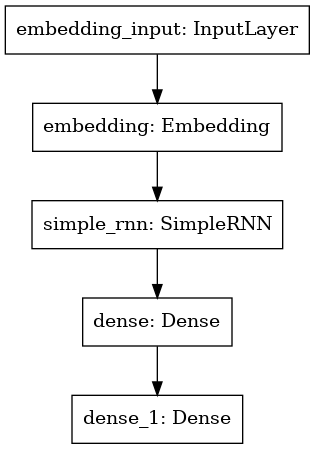

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(single_rnn_model)

In [8]:
history_single_rnn = single_rnn_model.fit(
    train_data, train_labels,
    epochs = 30,
    batch_size = batch_size,
    validation_split = 0.2)

2022-08-02 04:36:33.762360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
40/40 [==============================] - 21s 472ms/step - loss: 0.6944 - accuracy: 0.5030 - val_loss: 0.6945 - val_accuracy: 0.5040
Epoch 2/30
40/40 [==============================] - 17s 434ms/step - loss: 0.6942 - accuracy: 0.5001 - val_loss: 0.6938 - val_accuracy: 0.4956
Epoch 3/30
40/40 [==============================] - 18s 460ms/step - loss: 0.6944 - accuracy: 0.5028 - val_loss: 0.6991 - val_accuracy: 0.5040
Epoch 4/30
40/40 [==============================] - 17s 426ms/step - loss: 0.6943 - accuracy: 0.5062 - val_loss: 0.6933 - val_accuracy: 0.4946
Epoch 5/30
40/40 [==============================] - 19s 470ms/step - loss: 0.6939 - accuracy: 0.4979 - val_loss: 0.6967 - val_accuracy: 0.4968
Epoch 6/30
40/40 [==============================] - 18s 449ms/step - loss: 0.6938 - accuracy: 0.5082 - val_loss: 0.6953 - val_accuracy: 0.4906
Epoch 7/30
40/40 [==============================] - 18s 446ms/step - loss: 0.6942 - accuracy: 0.5043 - val_loss: 0.6954 - val_accuracy: 0.4938

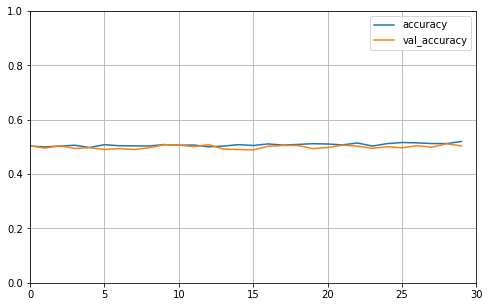

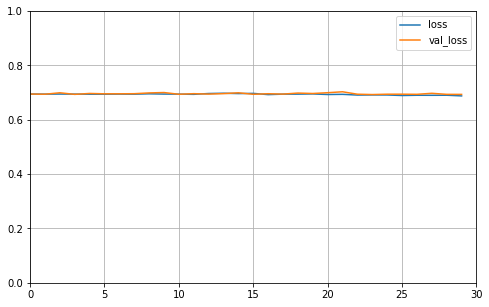

In [9]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
plot_learning_curves(history_single_rnn, 'accuracy', 30, 0, 1)
plot_learning_curves(history_single_rnn, 'loss', 30, 0, 1)

In [10]:
print(single_rnn_model.evaluate(
    test_data, test_labels,
    batch_size = batch_size,
    verbose = 0))

[0.6926835179328918, 0.5043200254440308]


In [11]:
embedding_dim = 16
batch_size = 512
# 双向双层循环神经网络
model=keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim,
                           input_length = max_length),
    keras.layers.Bidirectional(
        keras.layers.SimpleRNN(units=64,return_sequences=True)), # 得到max_length个输出(None, 500, 128)
    keras.layers.Bidirectional(
        keras.layers.SimpleRNN(units=64,return_sequences=False)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])
model.summary()
model.compile(optimizer = 'adam',
             #  当只有两个标签类别（假定为0和1）时，使用二值交叉熵损失
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 128)          10368     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               24704     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 203,393
Trainable params: 203,393
Non-trainable params: 0
_________________________________________________________________


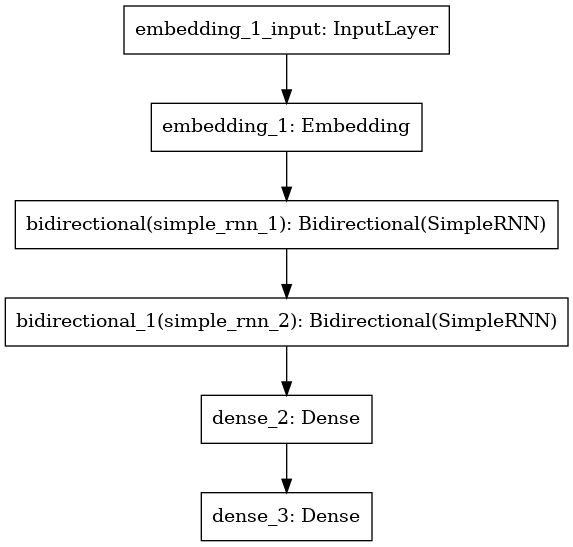

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [13]:
print((16*64+64*64+64)*2)
print((64+64)*64+64*64+64)
print(model.variables)

10368
12352
[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 16) dtype=float32, numpy=
array([[-0.01843842,  0.02169994,  0.01701266, ..., -0.0381117 ,
         0.00489147, -0.00867581],
       [-0.03462989,  0.0105046 ,  0.02192482, ...,  0.04554904,
        -0.00361216,  0.006317  ],
       [ 0.00568234, -0.04474999,  0.02612338, ...,  0.04207433,
         0.00154008,  0.00354713],
       ...,
       [ 0.0063354 , -0.00486765,  0.00997747, ..., -0.04224831,
         0.02403878,  0.04335631],
       [ 0.04518939, -0.0098673 , -0.02359623, ...,  0.0002258 ,
        -0.01172473,  0.04103675],
       [ 0.02526534,  0.01767537, -0.04989427, ...,  0.04576105,
         0.02155772,  0.02690445]], dtype=float32)>, <tf.Variable 'bidirectional/forward_simple_rnn_1/simple_rnn_cell_2/kernel:0' shape=(16, 64) dtype=float32, numpy=
array([[-0.1316591 ,  0.19604617,  0.08846483, ...,  0.08292452,
         0.18734899, -0.00450233],
       [ 0.17507774, -0.06328519,  0.21027869, ...,  0.07083705

In [14]:
history = model.fit(
    train_data, train_labels,
    epochs = 30,
    batch_size = batch_size,
    validation_split = 0.2)

Epoch 1/30
40/40 [==============================] - 70s 2s/step - loss: 0.6997 - accuracy: 0.5058 - val_loss: 0.7003 - val_accuracy: 0.4934
Epoch 2/30
40/40 [==============================] - 67s 2s/step - loss: 0.6932 - accuracy: 0.5203 - val_loss: 0.7098 - val_accuracy: 0.5338
Epoch 3/30
40/40 [==============================] - 68s 2s/step - loss: 0.6981 - accuracy: 0.5143 - val_loss: 0.7035 - val_accuracy: 0.5100
Epoch 4/30
40/40 [==============================] - 68s 2s/step - loss: 0.6643 - accuracy: 0.5957 - val_loss: 0.6988 - val_accuracy: 0.5364
Epoch 5/30
40/40 [==============================] - 68s 2s/step - loss: 0.5738 - accuracy: 0.7024 - val_loss: 0.7712 - val_accuracy: 0.5416
Epoch 6/30
40/40 [==============================] - 68s 2s/step - loss: 0.4389 - accuracy: 0.8019 - val_loss: 0.8487 - val_accuracy: 0.5438
Epoch 7/30
40/40 [==============================] - 68s 2s/step - loss: 0.3110 - accuracy: 0.8750 - val_loss: 1.2124 - val_accuracy: 0.5300
Epoch 8/30
40/40 [==

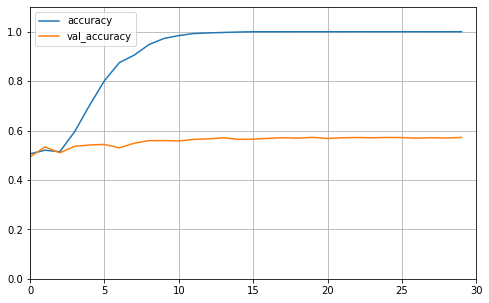

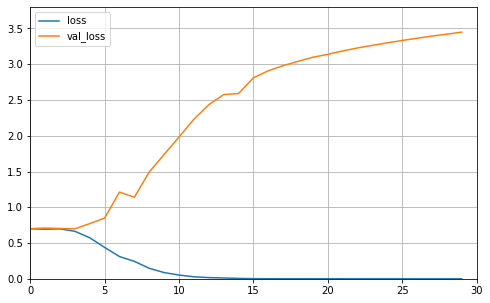

In [15]:
model.evaluate(test_data, test_labels, batch_size = batch_size, verbose = 0)
plot_learning_curves(history, 'accuracy', 30, 0, 1.1)
plot_learning_curves(history, 'loss', 30, 0, 3.8)

In [16]:
embedding_dim = 16
batch_size = 512
# 过拟合改为双向单层循环神经网络
bi_rnn_model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim,
                           input_length = max_length),
    keras.layers.Bidirectional(
        keras.layers.SimpleRNN(units = 32, return_sequences = False)),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid'),])
bi_rnn_model.summary()
bi_rnn_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                3136      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
bi_rnn_model.variables

[<tf.Variable 'embedding_2/embeddings:0' shape=(10000, 16) dtype=float32, numpy=
 array([[-0.03145599, -0.01274766, -0.02495781, ...,  0.0334102 ,
          0.04059244, -0.01456266],
        [ 0.01063597, -0.00116798, -0.01273993, ...,  0.01011024,
         -0.01726582,  0.02697659],
        [-0.00949983, -0.04599756, -0.04563949, ...,  0.00669592,
          0.00104221,  0.00025499],
        ...,
        [ 0.00648686, -0.02681389, -0.04875718, ...,  0.00748936,
         -0.00314325,  0.04655553],
        [ 0.00075547,  0.02300949, -0.04562774, ...,  0.02155408,
         -0.03262468, -0.00574074],
        [-0.01519511,  0.03438495,  0.02144357, ..., -0.01986906,
          0.03151034,  0.00085254]], dtype=float32)>,
 <tf.Variable 'bidirectional_2/forward_simple_rnn_3/simple_rnn_cell_8/kernel:0' shape=(16, 32) dtype=float32, numpy=
 array([[ 0.27533844, -0.1197698 , -0.26801458,  0.24893203, -0.20859377,
         -0.2220993 ,  0.06976569,  0.1765624 , -0.20003383,  0.16022816,
          0

In [18]:
history = bi_rnn_model.fit(
    train_data, train_labels,
    epochs = 30,
    batch_size = batch_size,
    validation_split = 0.2)

Epoch 1/30
40/40 [==============================] - 36s 863ms/step - loss: 0.6920 - accuracy: 0.5229 - val_loss: 0.6883 - val_accuracy: 0.5594
Epoch 2/30
40/40 [==============================] - 34s 843ms/step - loss: 0.6537 - accuracy: 0.6307 - val_loss: 0.5982 - val_accuracy: 0.7030
Epoch 3/30
40/40 [==============================] - 34s 852ms/step - loss: 0.4401 - accuracy: 0.8056 - val_loss: 0.4339 - val_accuracy: 0.8132
Epoch 4/30
40/40 [==============================] - 34s 859ms/step - loss: 0.3173 - accuracy: 0.8707 - val_loss: 0.4246 - val_accuracy: 0.8104
Epoch 5/30
40/40 [==============================] - 35s 853ms/step - loss: 0.2203 - accuracy: 0.9180 - val_loss: 0.4121 - val_accuracy: 0.8408
Epoch 6/30
40/40 [==============================] - 34s 848ms/step - loss: 0.1325 - accuracy: 0.9556 - val_loss: 0.4813 - val_accuracy: 0.8294
Epoch 7/30
40/40 [==============================] - 34s 857ms/step - loss: 0.0649 - accuracy: 0.9823 - val_loss: 0.5983 - val_accuracy: 0.8120

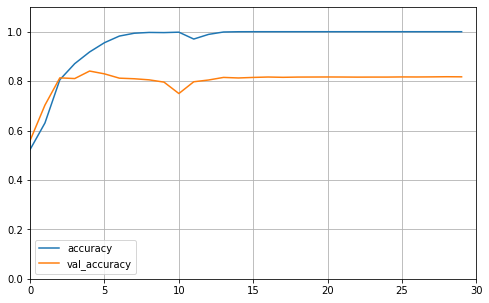

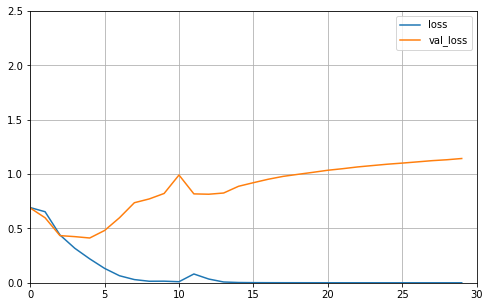

In [19]:
plot_learning_curves(history, 'accuracy', 30, 0, 1.1)
plot_learning_curves(history, 'loss', 30, 0, 2.5)

In [20]:
bi_rnn_model.evaluate(test_data, test_labels, batch_size = batch_size, verbose = 0)

[1.3272312879562378, 0.7870399951934814]

In [21]:
inputs=np.random.random([32, 10, 8]).astype(np.float32) # 32个样本10个词 8密集向量大小
simple_rnn=tf.keras.layers.SimpleRNN(4)
outputs=simple_rnn(inputs)
print(outputs)
# return_state是否返回除输出之外的最后一个状态 所有状态的最后一个 （tong作为最后输出结果的）
simple_rnn=tf.keras.layers.SimpleRNN(4, return_sequences=False, return_state=True) 
whole_sequence_output,final_state=simple_rnn(inputs)

tf.Tensor(
[[ 0.93271273  0.96132535 -0.9871276   0.954006  ]
 [ 0.9663535   0.95250916 -0.9864302   0.9646187 ]
 [ 0.9196948   0.94343555 -0.9768961   0.97830415]
 [ 0.90679574  0.9344307  -0.95555836  0.95756745]
 [ 0.9860705   0.95748705 -0.98164564  0.89878446]
 [ 0.9102472   0.7843115  -0.9739167   0.9272803 ]
 [ 0.9815168   0.9657636  -0.9855517   0.9358348 ]
 [ 0.9644878   0.9557104  -0.9850702   0.9723667 ]
 [ 0.94464177  0.82944304 -0.8652141   0.9189851 ]
 [ 0.8550633   0.97105396 -0.9571187   0.95930153]
 [ 0.43985656  0.956823   -0.83657336  0.94480366]
 [ 0.9467933   0.9176144  -0.9435947   0.9669442 ]
 [ 0.8505356   0.93813074 -0.96356416  0.88467675]
 [ 0.93040234  0.8656961  -0.9540932   0.95878243]
 [ 0.8508718   0.9360498  -0.95273256  0.88759196]
 [ 0.9789818   0.9206602  -0.9702573   0.9429478 ]
 [ 0.9462138   0.96026444 -0.94548094  0.94642466]
 [ 0.93211854  0.9810417  -0.93882835  0.97531134]
 [ 0.9157756   0.9478022  -0.97285634  0.9587867 ]
 [ 0.9714222   0.967

In [22]:
print(whole_sequence_output)
print(final_state)

tf.Tensor(
[[ 0.34873822 -0.8409971   0.6248229  -0.07964683]
 [ 0.78693914 -0.27706575 -0.13290355  0.24561031]
 [-0.5995698  -0.7392125  -0.04158353 -0.4464251 ]
 [-0.6719915  -0.6089304  -0.23074038  0.08773538]
 [-0.5742142  -0.55257493 -0.06517714 -0.081961  ]
 [ 0.7368791   0.4322076  -0.1550176  -0.17842838]
 [-0.60645133  0.21345079 -0.2706551  -0.1610176 ]
 [ 0.60356927  0.23474868  0.6679233  -0.27588913]
 [-0.612234    0.10912877 -0.12212446  0.30599263]
 [-0.6964839  -0.7756151  -0.17737688  0.00279646]
 [ 0.05724343 -0.25878096 -0.13057023 -0.10819574]
 [ 0.00852031  0.03921639  0.09395713  0.6247616 ]
 [ 0.1543369  -0.46207598 -0.26658666 -0.71718806]
 [ 0.35830736 -0.1281519   0.43426678  0.09643106]
 [-0.16333604  0.07315625  0.20816468 -0.68541217]
 [ 0.0832596   0.46250615  0.17473622 -0.07090449]
 [ 0.11192636 -0.15383749  0.6354641  -0.76901096]
 [-0.6362654  -0.4377961  -0.22160646  0.17552224]
 [-0.34786505 -0.8701801   0.15927155 -0.5062356 ]
 [-0.43171856 -0.754